<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/HR_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

path = 'drive/Shareddrives/AIOT_LAB_DOCS/Data/'

In [2]:
cd drive/Shareddrives/AIOT_LAB_DOCS/Data/

/content/drive/Shareddrives/AIOT_LAB_DOCS/Data


##  Read matfile

In [3]:
files = os.listdir('/content/'+path)
files

['DATA_02_TYPE02_BPMtrace.mat',
 'DATA_03_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02_BPMtrace.mat',
 'DATA_05_TYPE02_BPMtrace.mat',
 'DATA_06_TYPE02_BPMtrace.mat',
 'DATA_07_TYPE02_BPMtrace.mat',
 'DATA_08_TYPE02_BPMtrace.mat',
 'DATA_10_TYPE02_BPMtrace.mat',
 'DATA_09_TYPE02_BPMtrace.mat',
 'DATA_11_TYPE02_BPMtrace.mat',
 'DATA_01_TYPE01_BPMtrace.mat',
 'DATA_12_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02.mat',
 'DATA_05_TYPE02.mat',
 'DATA_01_TYPE01.mat',
 'DATA_06_TYPE02.mat',
 'DATA_03_TYPE02.mat',
 'DATA_11_TYPE02.mat',
 'DATA_12_TYPE02.mat',
 'DATA_07_TYPE02.mat',
 'DATA_02_TYPE02.mat',
 'DATA_08_TYPE02.mat',
 'DATA_10_TYPE02.mat',
 'DATA_09_TYPE02.mat',
 'TrainSubj1',
 'TrainSubj2',
 'TrainSubj3',
 'TrainSubj4',
 'TrainSubj5',
 'TrainSubj6',
 'TrainSubj7',
 'TrainSubj8',
 'TrainSubj9',
 'TrainSubj10',
 'TrainSubj11',
 'TrainSubj12',
 'resultsS0.pickle',
 'resultsS1.pickle',
 'resultsS2.pickle',
 'my_first_model.png',
 'resultsS4.pickle',
 'resultsS5.pickle',
 'resultsS7.pickle',
 'result

## Read into dataframe of pandas

In [4]:
import pandas as pd
from pathlib import Path

import scipy.io as sio
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Xscaled = scaler.fit_transform(dfs[1])

def read_folder(mat_folder, HR = False):
    ''' Input is a folder with csv files; return list of data frames.'''
    mat_folder = Path(mat_folder).absolute()
    if HR == False:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and not('BPMtrace' in f.name)]
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(scaler.fit_transform(pd.DataFrame(sio.loadmat(mat_file)['sig']).T)).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    else:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and ('BPMtrace' in f.name)] 
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(pd.DataFrame(sio.loadmat(mat_file)['BPM0'])).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    #data = scaler.fit_transform(sio.loadmat(csv_file)['sig'])
    # the assign() method adds a helper column rating
    
    return mat_files, dfs

In [5]:
parent_path ='/content/'+path
mat_files, dfs = read_folder(parent_path)

### Check the read file

In [6]:
mat_files

[PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_04_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_05_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_01_TYPE01.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_06_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_03_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_11_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_12_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_07_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_02_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_08_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_10_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_09_TYPE02.mat')]

## Read heart rate data

In [7]:
hr_file, hrdfs = read_folder(parent_path, HR=True)

In [ ]:
hrdfs[8]

148


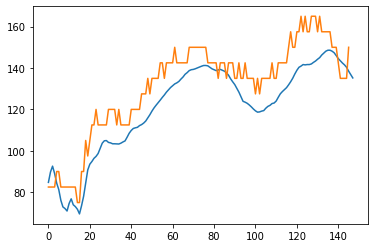

In [109]:
import matplotlib.pyplot as plt
plt.plot(hrdfs[0][0])
plt.plot(BPM)
print(len(hrdfs[0][0]))

## Compute heart rate 

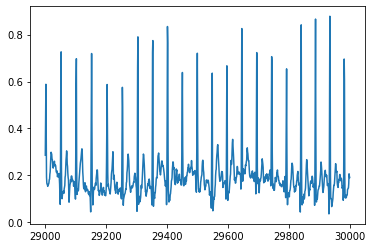

In [72]:
ECG0 = dfs[0][0]
plt.plot(ECG0[29000:30000])

In [73]:
# Check the length of data
len(ECG0)
dis = 1000 # 8 seconds
step = 250 # 2 seconds
#ECGseg = []
N = len(ECG0)
ECGseg = [ECG0[(i*step):(i*step + dis)] for i in range(0,int(N/step) - 3)]


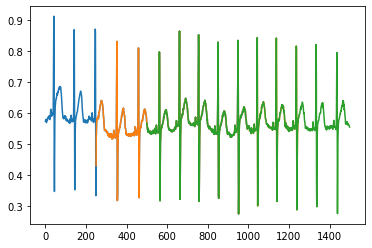

In [12]:
plt.plot(ECGseg[0])
plt.plot(ECGseg[1])
plt.plot(ECGseg[2])


24


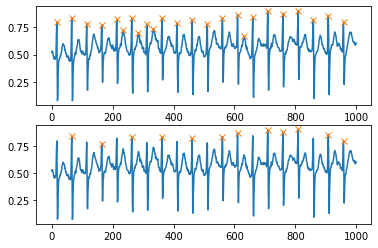

In [165]:
from scipy.signal import find_peaks
x = ECGseg[101].values
prom = 0.2
peaks, _ = find_peaks(x, prominence=prom)
peaks2, _ = find_peaks(x, prominence=prom, distance=50)
plt.subplot(211)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.subplot(212)
plt.plot(x)
plt.plot(peaks2, x[peaks2], "x")
Nbeat = len(peaks)

BPM = Nbeat
print(BPM)

### Detect R Peak using derivative and filtering
reference: **Peak Detection Algorithm for ECG wave**
  https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6255935

### STEP 1: DERIVATIVE

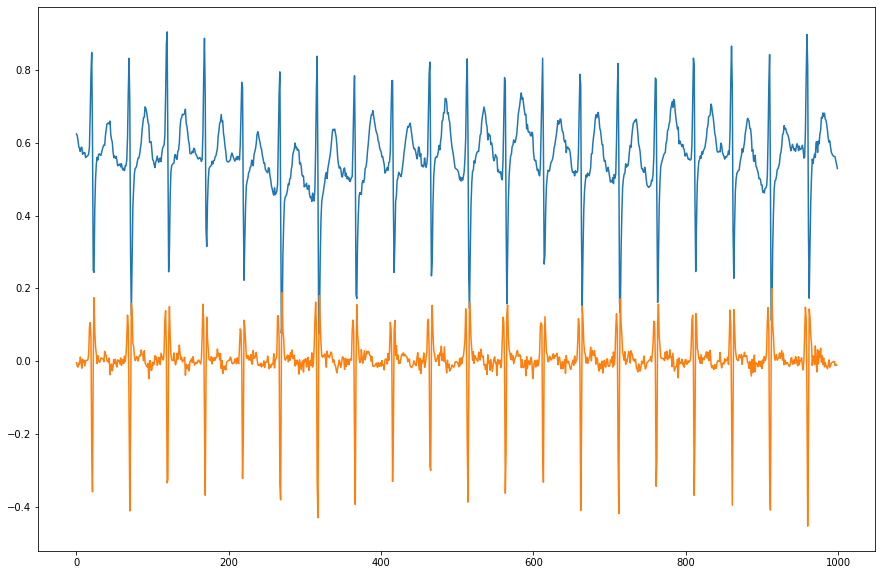

In [166]:
import numpy as np

# derivative
x = ECGseg[100].values
dx = np.diff(x)
plt.figure(figsize=(15,10))
plt.plot(x)
plt.plot(dx)

### STEP 2: BANDPASS FILTERING

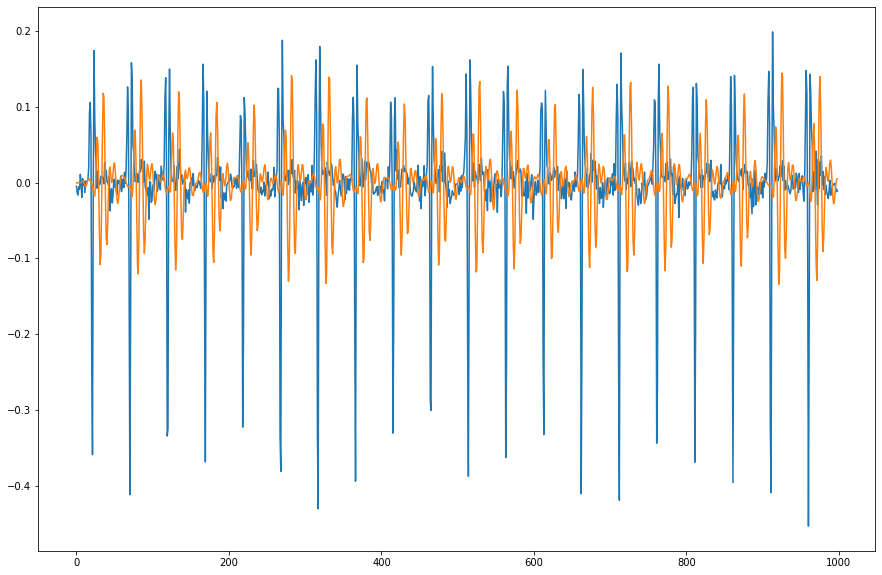

In [170]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

# insert a zero-buffer window of 200 points
#buff = np.asarray([0]*250)

#dx_buff = np.concatenate((buff, dx))
fs = 125
lowcut = 8
highcut = 18
N = 5 # in the paper is 20
y = butter_bandpass_filter(dx, lowcut, highcut, fs, order= N)

plt.figure(figsize=(15,10))
plt.plot(dx)
plt.plot(y)

### STEP 3: SQUARE FILTERED SIGNAL $X^2$

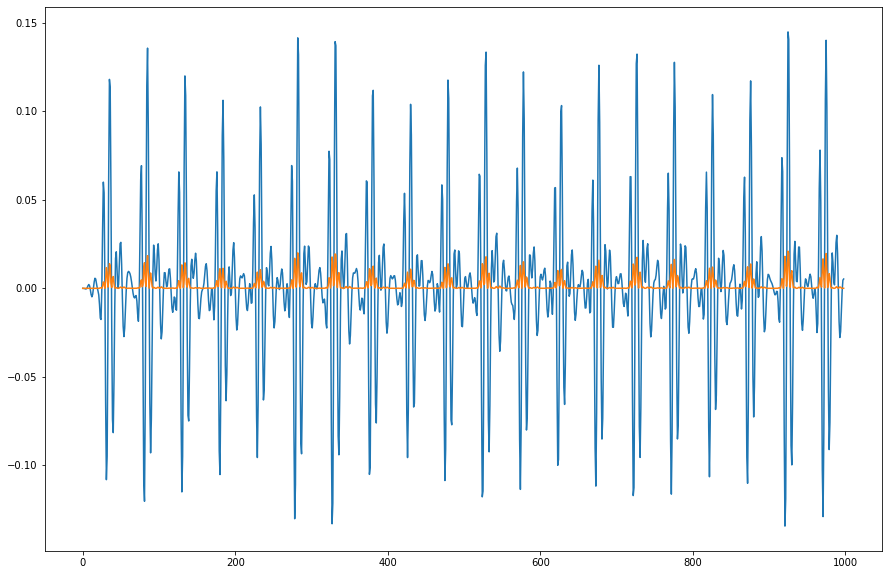

In [171]:
import pandas as pd

dx2 = np.square(y)
plt.figure(figsize=(15,10))
plt.plot(y)
plt.plot(dx2)

### STEP 4: Entropy normalized

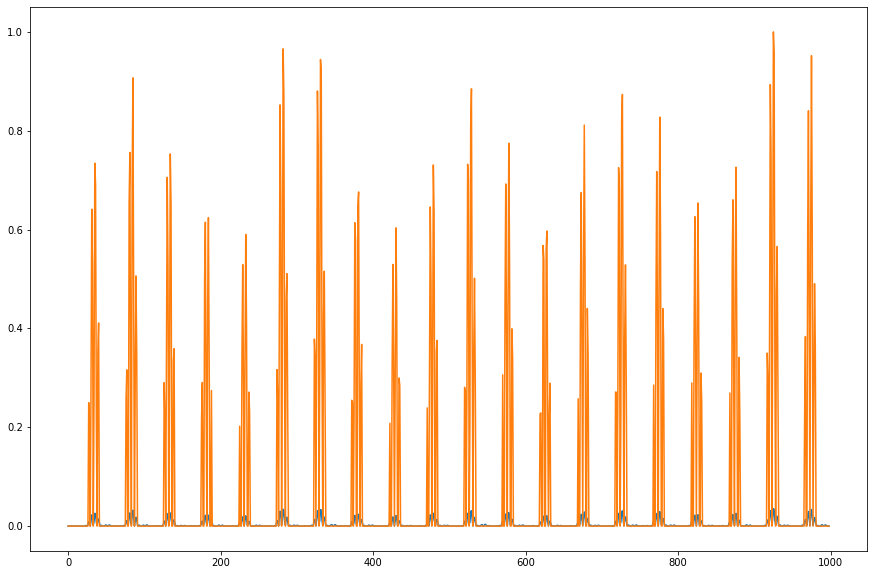

In [172]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

sn = [-t*np.log10(t) for t in dx2]
#sn = [-t*np.log10(t) for t in sn]
scaler = MinMaxScaler()

data = pd.DataFrame(sn).fillna(0)
dx2_norm = scaler.fit_transform(data)
# reshape to 1-D
dx2_norm = np.reshape(dx2_norm, -1)
dx2_norm[dx2_norm < 0.2] = 0

plt.figure(figsize=(15,10))
plt.plot(sn)
plt.plot(dx2_norm)

In [53]:
dx2_norm = scaler.fit_transform(data)


### STEP 5: LINEAR ZERO-PHASE FILTER

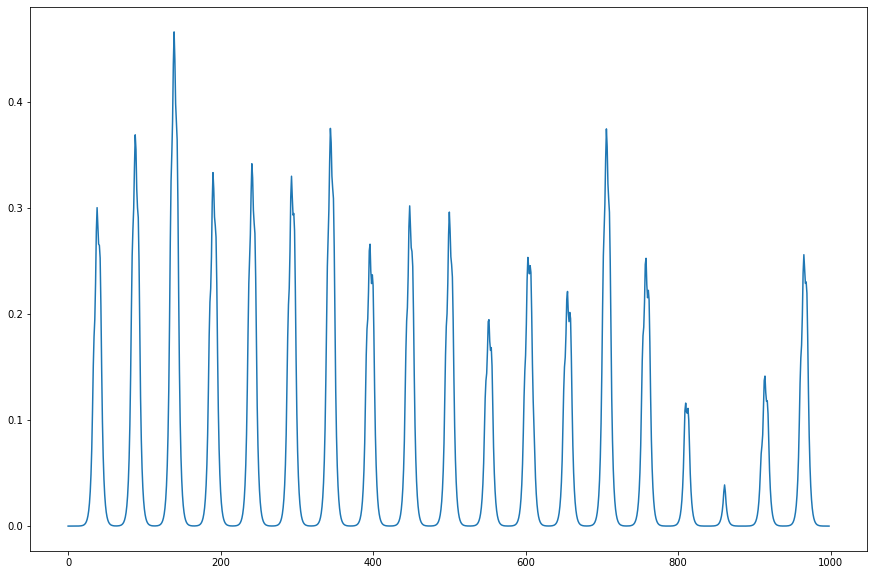

In [143]:
from scipy.signal import filtfilt
# Create an order 3 lowpass butterworth filter.
b, a = butter(1, 0.125)

sn_filt = filtfilt(b, a, dx2_norm, irlen=25)

plt.figure(figsize=(15,10))
#plt.plot(dx2_norm)
plt.plot(sn_filt)


22


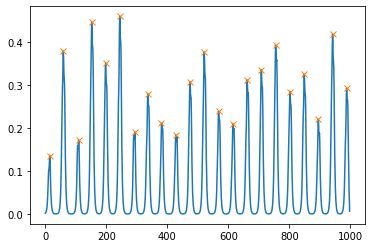

In [132]:
from scipy.signal import find_peaks 

peaks, _ = find_peaks(sn_filt, prominence=0.05)


plt.plot(sn_filt)
plt.plot(peaks, sn_filt[peaks], "x")

Nbeat = len(peaks)
print(Nbeat)

## Function detect peaks

In [158]:
import numpy as np
from scipy.signal import butter, sosfilt, sosfreqz, filtfilt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from scipy.signal import find_peaks 

peaks, _ = find_peaks(sn_filt, prominence=0.2)

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

# insert a zero-buffer window of 200 points
#buff = np.asarray([0]*250)

#dx_buff = np.concatenate((buff, dx))

def peak_count(ecg, w=0.2,fs = 125, lowcut = 8, highcut = 18, order=5, threshold=0.2):
  # Step 1: derivative
  dx = np.diff(ecg)
  # Step 2: filtering using bandpass filtering
  y = butter_bandpass_filter(dx, lowcut, highcut, fs, order= order)
  # Step 3: square signal
  dx2 = np.square(y)
  # Step 4: Enntroy Normalized
  sn = [-t*np.log10(t) if t!=0 else 0 for t in dx2 ]

  scaler = MinMaxScaler()

  data = pd.DataFrame(sn).fillna(0)
  dx2_norm = scaler.fit_transform(data)
    # reshape to 1-D
  dx2_norm = np.reshape(dx2_norm, -1)
    # remove value below threshold
  dx2_norm[dx2_norm < threshold] = 0
  # Step 5: linear zero-phase filtering
  #Create an order 3 lowpass butterworth filter.
  b, a = butter(1, 0.125)
  sn_filt = filtfilt(b, a, dx2_norm)
  # Step 6: detect peak
  peaks, _ = find_peaks(sn_filt, prominence=w)
  return len(peaks)

### Test function

In [155]:
a = [1, 2, 3, 4, 5]
b = [i if i!=3 else 0 for i in a ]
b

[1, 2, 0, 4, 5]

In [162]:
ECG0 = dfs[2][0]
# Check the length of data
len(ECG0)
dis = 1000 # 8 seconds
step = 250 # 2 seconds
#ECGseg = []
N = len(ECG0)
ECGseg = [ECG0[(i*step):(i*step + dis)] for i in range(0,int(N/step) - 3)]



In [163]:
BPM = []
weight = 0.2

for ecg in ECGseg[:]:
  n = peak_count(ecg, w=0.05)
  bpm = n*7.5    
  BPM.append(bpm)


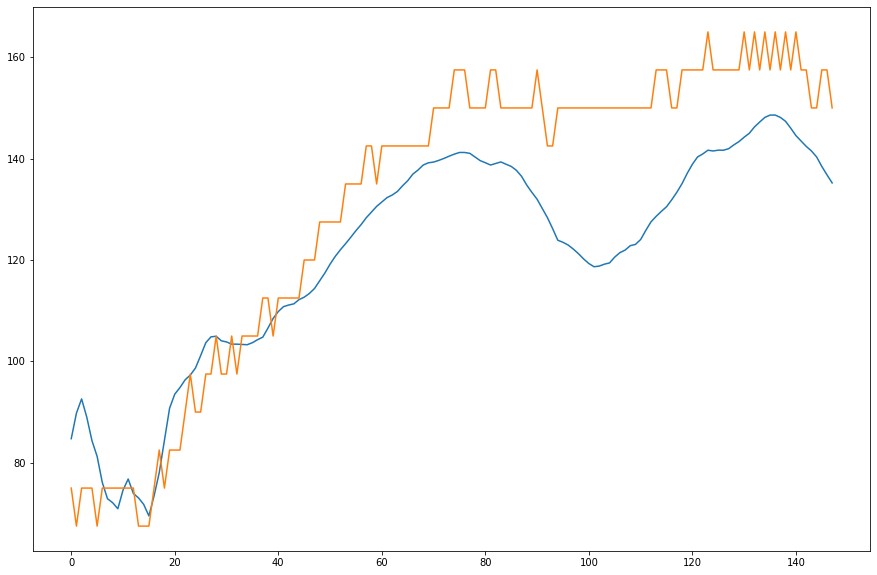

In [164]:
plt.figure(figsize=(15,10))
plt.plot(hrdfs[0][0])
plt.plot(BPM)

In [134]:
BPM.index(max(BPM))

122

In [168]:
peak_count(ECGseg[100], w=0.05)

20

In [84]:
import numpy as np
a = np.diff(peaks)
print(a)
print(peaks)
np.std(a), np.median(a)

[102 108 114 106 107 101  99  99]
[100 202 310 424 530 637 738 837 936]


(4.873397172404482, 104.0)

In [85]:
def select_weight(ecg, weight=0.2):
  Nset = []
  D = []
  Dmin= []
  Dmax= []
  #rang = [weight + i*0.05 for i in range(-1,6)]
  W = []
  w = 0.1
  # initialize for first iteration
  while(1):

  #for w in rang:
    peaks, _ = find_peaks(ecg, prominence=w)
    if len(peaks) > 2:
      a = np.diff(peaks)
      D.append(np.std(a))
      Dmin.append(min(a))
      Dmax.append(max(a))
      Nset.append(len(peaks))
    else:
      break
    print(w)
    W.append(w)
    w= w+0.05
    
    
  return Nset, D, Dmin, Dmax, W

In [86]:
print(select_weight(ECGseg[47]))

0.1
0.15000000000000002
0.2
0.25
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.6
([37, 27, 19, 17, 17, 17, 16, 15, 11, 4, 3], [10.393492741038726, 14.742162695708712, 9.673688382079519, 0.9499177595981665, 0.9499177595981665, 0.9499177595981665, 0.9285592184789413, 15.592384326317509, 28.600699292150182, 79.9041091976293, 3.0], [8, 16, 19, 56, 56, 56, 56, 56, 56, 175, 345], [56, 58, 59, 59, 59, 59, 59, 118, 118, 345, 351], [0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6])


In [ ]:
BPM = []
weight = 0.2
i = 0
peaks, _ = find_peaks(ECGseg[0], prominence=weight)
Nlast= 15 #len(peaks) 17
dmed = 62
for ecg in ECGseg[45:50]:
  peaks, _ = find_peaks(ecg, prominence=weight)
  ### Check peaks in range [5 - 65]
  while len(peaks)<=5 or len(peaks) >= 65:
    if len(peaks) <= 5:
      weight = weight + 0.05
    if len(peaks) >=60:
      weight = weight - 0.05
    peaks, _ = find_peaks(ecg, prominence=weight)
  
  ### find optimal weight that minimum std
  a = np.diff(peaks)
  while not( np.std(a) <= 5 and np.abs(len(peaks) - Npre) <=3):
    




  ### Check std
  
      
  print(weight)
  a = np.diff(peaks)
  bpm = len(peaks)*7.5
  BPM.append(bpm)
  print(i)
  i = i + 1
plt.plot(BPM)

In [ ]:
 np.median(np.diff(peaks))*2 < max(np.diff(peaks))

In [ ]:
np.median(np.diff(peaks)), max(np.diff(peaks)), np.median(x[peaks]), len(peaks)

In [ ]:
plt.boxplot(x[peaks])

In [ ]:
ECG0[]

### Adaptive detect peaks
* default prominence w=0.2
* if the distance between outline will adapt the weight
** Increasing weight if many peaks detects
** Decreasing weight if less peaks detects

0.25
0.3
0.25
0.2


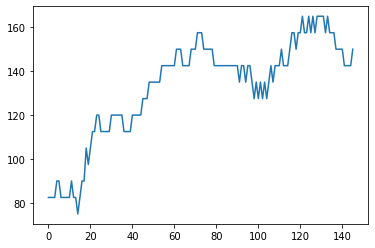

In [88]:
BPM = []
weight = 0.2
#i = 0
for ecg in ECGseg[:]:
  peaks, _ = find_peaks(ecg, prominence=weight)
  a = np.diff(peaks)
  while not (2*min(a) > np.median(a) and np.median(a)*2 > max(a)):
    if 2*min(a) <np.median(a): 
      #print('go 1')
      weight = weight + 0.05
      peaks, _ = find_peaks(ecg, prominence=weight)
      if np.median(np.diff(peaks))*2 <= max(np.diff(peaks)):
        #print('go 1a')
        weight = weight - 0.05 # back to the old values
        peaks, _ = find_peaks(ecg, prominence=weight, distance= int(np.median(a)*0.9))
        if np.median(np.diff(peaks)) > 2*min(np.diff(peaks)):
          #print('go break')
          weight = 0.2
          break
      #distance= np.mean(a)*0.9
    #a = np.diff(peaks)  
    if np.median(a)*2 <= max(a): 
      #print('go 2')
      weight = weight - 0.05
      peaks, _ = find_peaks(ecg, prominence=weight)
      if np.median(np.diff(peaks)) > 2*min(np.diff(peaks)):
        #print('go 2a')
        weight = weight + 0.05 # back to the old values
        peaks, _ = find_peaks(ecg, prominence=weight, distance= int(np.median(a)*0.9))
        if 2*np.median(np.diff(peaks)) <= max(np.diff(peaks)):
          #print('go break')
          weight = 0.2
          break
    print(weight)
    a = np.diff(peaks)
  bpm = len(peaks)*7.5
  BPM.append(bpm)
  #print(i)
  #i = i + 1
plt.plot(BPM)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hrdfs[1][0])
print(len(hrdfs[0][0]))


In [ ]:
weight